# Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json
import requests

## Get Current Data from Lending Club

In [3]:
api_key =open('apikey.txt','r').read()

headers = {'Authorization':api_key}
url='https://api.lendingclub.com/api/investor/v1/loans/listing'

r=requests.get(url, headers=headers)

In [4]:
type(r.json())

dict

In [5]:
r.json()

{'asOfDate': '2019-12-27T21:25:27.613-08:00',
 'loans': [{'id': 163618465,
   'memberId': 206116253,
   'loanAmount': 11425.0,
   'fundedAmount': 7525.0,
   'term': 36,
   'intRate': 23.05,
   'expDefaultRate': 12.86,
   'serviceFeeRate': 1.52,
   'installment': 442.56,
   'grade': 'D',
   'subGrade': 'D3',
   'empLength': 0,
   'homeOwnership': 'RENT',
   'annualInc': 28600.0,
   'isIncV': 'VERIFIED',
   'acceptD': '2019-12-18T19:23:16.000-08:00',
   'expD': '2020-01-26T18:00:00.000-08:00',
   'listD': '2019-12-27T18:00:00.000-08:00',
   'creditPullD': '2019-12-18T19:06:17.000-08:00',
   'reviewStatusD': '2019-12-27T14:01:02.000-08:00',
   'reviewStatus': 'APPROVED',
   'desc': None,
   'purpose': 'debt_consolidation',
   'addrZip': '856xx',
   'addrState': 'AZ',
   'investorCount': None,
   'ilsExpD': '2019-12-27T18:00:00.000-08:00',
   'initialListStatus': 'F',
   'empTitle': 'Support Associate Level II',
   'accNowDelinq': 0,
   'accOpenPast24Mths': 1,
   'bcOpenToBuy': 6296,
   'p

In [6]:
data = r.json()
myData =data['loans']

## with open() as

In [7]:
with open('current_list.txt', 'w') as outfile:
    json.dump(myData, outfile)

In [8]:
df_current=pd.read_json('current_list.txt')

In [9]:
# why we only get few loans through api, but there are much more listed on the lending club website?  -- Might because API only 
# gives you the data from the latest update.

df_current.tail()

,id,memberId,loanAmount,fundedAmount,term,intRate,expDefaultRate,serviceFeeRate,installment,grade,...,secAppOpenAcc,secAppRevolUtil,secAppNumRevAccts,secAppChargeoffWithin12Mths,secAppCollections12MthsExMed,secAppMthsSinceLastMajorDerog,revolBalJoint,disbursementMethod,openActIl,secAppOpenActIl
0,163618465,206116253,11425,7525,36,23.05,12.86,1.52,442.56,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH,2,NaN
1,164004778,206821481,13000,8175,36,8.81,2.63,0.88,412.25,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH,1,NaN
2,162755927,204204230,10000,3825,36,20.55,12.86,1.52,374.45,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH,4,NaN
3,164005045,206821755,10000,2775,60,12.40,5.53,0.75,224.48,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH,4,NaN


In [10]:
# A better way to read a json file (can read json to data frame with more complex structure)

df_current = pd.io.json.json_normalize(myData)

In [11]:
df_current.tail()

,id,memberId,loanAmount,fundedAmount,term,intRate,expDefaultRate,serviceFeeRate,installment,grade,...,secAppOpenAcc,secAppRevolUtil,secAppNumRevAccts,secAppChargeoffWithin12Mths,secAppCollections12MthsExMed,secAppMthsSinceLastMajorDerog,revolBalJoint,disbursementMethod,openActIl,secAppOpenActIl
0,163618465,206116253,11425.0,7525.0,36,23.05,12.86,1.52,442.56,D,...,None,None,None,None,None,None,None,CASH,2,None
1,164004778,206821481,13000.0,8175.0,36,8.81,2.63,0.88,412.25,A,...,None,None,None,None,None,None,None,CASH,1,None
2,162755927,204204230,10000.0,3825.0,36,20.55,12.86,1.52,374.45,D,...,None,None,None,None,None,None,None,CASH,4,None
3,164005045,206821755,10000.0,2775.0,60,12.40,5.53,0.75,224.48,B,...,None,None,None,None,None,None,None,CASH,4,None


## Historical Data

In [12]:
df_2014 = pd.read_csv('Loan2014_20191216.csv', skiprows=1)

C:\Users\dhubi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
print(df_2014.head())

         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  36805548        NaN    10400.0      10400.0          10400.0   36 months   
1  38098114        NaN    15000.0      15000.0          15000.0   60 months   
2  37822187        NaN     9600.0       9600.0           9600.0   36 months   
3  37612354        NaN    12800.0      12800.0          12800.0   60 months   
4  37842129        NaN    21425.0      21425.0          21425.0   60 months   

  int_rate  installment grade sub_grade  ...  \
0    6.99%       321.08     A        A3  ...   
1   12.39%       336.64     C        C1  ...   
2   13.66%       326.53     C        C3  ...   
3   17.14%       319.08     D        D4  ...   
4   15.59%       516.36     D        D1  ...   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   

In [14]:
df_2014.shape

(235631, 150)

In [15]:
print('----------current-----------------')
for col in df_current.columns.values:
    print(col)
print('----------current-----------------')

----------current-----------------
id
memberId
loanAmount
fundedAmount
term
intRate
expDefaultRate
serviceFeeRate
installment
grade
subGrade
empLength
homeOwnership
annualInc
isIncV
acceptD
expD
listD
creditPullD
reviewStatusD
reviewStatus
desc
purpose
addrZip
addrState
investorCount
ilsExpD
initialListStatus
empTitle
accNowDelinq
accOpenPast24Mths
bcOpenToBuy
percentBcGt75
bcUtil
dti
delinq2Yrs
delinqAmnt
earliestCrLine
ficoRangeLow
ficoRangeHigh
inqLast6Mths
mthsSinceLastDelinq
mthsSinceLastRecord
mthsSinceRecentInq
mthsSinceRecentRevolDelinq
mthsSinceRecentBc
mortAcc
openAcc
pubRec
totalBalExMort
revolBal
revolUtil
totalBcLimit
totalAcc
totalIlHighCreditLimit
numRevAccts
mthsSinceRecentBcDlq
pubRecBankruptcies
numAcctsEver120Ppd
chargeoffWithin12Mths
collections12MthsExMed
taxLiens
mthsSinceLastMajorDerog
numSats
numTlOpPast12m
moSinRcntTl
totHiCredLim
totCurBal
avgCurBal
numBcTl
numActvBcTl
numBcSats
pctTlNvrDlq
numTl90gDpd24m
numTl30dpd
numTl120dpd2m
numIlTl
moSinOldIlAcct
numActv

In [16]:
print('----------2014-----------------')
for col in df_2014.columns.values:
    print(col)
print('----------2014-----------------')

----------2014-----------------
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all

## Format conversion of feature names 

In [17]:
current_feature = list(df_current.columns.values)

In [18]:
for i in range (len(current_feature)):
    current_feature[i] = str.lower(str(current_feature[i]))

In [19]:
current_feature[:5]

['id', 'memberid', 'loanamount', 'fundedamount', 'term']

In [20]:
his_feature = list(df_2014.columns.values)

In [21]:
for i in range (len(his_feature)):
    his_feature[i] = str(his_feature[i]).replace('_','')

In [22]:
his_feature[:5]

['id', 'memberid', 'loanamnt', 'fundedamnt', 'fundedamntinv']

In [23]:
common_feature = set(his_feature)&(set(current_feature))
print(len(common_feature))
print(common_feature)

100
{'mthssincelastmajorderog', 'mthssincercntil', 'numoprevtl', 'numtl120dpd2m', 'totalbclimit', 'mortacc', 'ilutil', 'revolbaljoint', 'accopenpast24mths', 'percentbcgt75', 'secappficorangehigh', 'openactil', 'tothicredlim', 'mosinrcnttl', 'initialliststatus', 'secappchargeoffwithin12mths', 'numrevtlbalgt0', 'secappmortacc', 'mthssincerecentbc', 'secapprevolutil', 'revolbal', 'mthssincerecentinq', 'openil12m', 'secappearliestcrline', 'intrate', 'totalacc', 'avgcurbal', 'openil24m', 'id', 'subgrade', 'numiltl', 'bcopentobuy', 'secappcollections12mthsexmed', 'taxliens', 'term', 'bcutil', 'totalcutl', 'numactvrevtl', 'secappnumrevaccts', 'numsats', 'totalilhighcreditlimit', 'secappficorangelow', 'emplength', 'memberid', 'numtl90gdpd24m', 'secappopenacc', 'annualinc', 'chargeoffwithin12mths', 'totcollamt', 'emptitle', 'pcttlnvrdlq', 'numbcsats', 'mthssincerecentrevoldelinq', 'allutil', 'grade', 'installment', 'openacc', 'totalrevhilim', 'numactvbctl', 'openacc6m', 'desc', 'addrstate', 'pu

In [24]:
his_unique=set(his_feature)-set(current_feature)
current_unique=set(current_feature)-set(his_feature)
print(len(current_unique), current_unique)
print(len(his_unique), his_unique)

19 {'reviewstatus', 'addrzip', 'ilsexpd', 'investorcount', 'mtgpayment', 'fundedamount', 'acceptd', 'loanamount', 'numacctsever120ppd', 'reviewstatusd', 'servicefeerate', 'expdefaultrate', 'housingpayment', 'listd', 'creditpulld', 'isincv', 'disbursementmethod', 'expd', 'isincvjoint'}
50 {'nextpymntd', 'totalrecprncp', 'pymntplan', 'url', 'issued', 'settlementdate', 'outprncp', 'lastcreditpulld', 'hardshiplength', 'hardshipflag', 'settlementstatus', 'totalrecint', 'totalpymnt', 'totalpymntinv', 'collectionrecoveryfee', 'lastpymntamnt', 'fundedamnt', 'hardshipamount', 'lastpymntd', 'title', 'hardshipstartdate', 'debtsettlementflag', 'verificationstatus', 'hardshipstatus', 'lastficorangehigh', 'hardshipreason', 'policycode', 'verificationstatusjoint', 'hardshiploanstatus', 'hardshiplastpaymentamount', 'paymentplanstartdate', 'loanamnt', 'zipcode', 'hardshippayoffbalanceamount', 'debtsettlementflagdate', 'outprncpinv', 'lastficorangelow', 'settlementterm', 'deferralterm', 'totalreclatefee

In [25]:
feature_dic={}
feature_dic['common_feature']=common_feature
feature_dic['his_unique']=his_unique
feature_dic['current_unique']=current_unique

In [26]:
feature_dic['current_unique']

{'acceptd',
 'addrzip',
 'creditpulld',
 'disbursementmethod',
 'expd',
 'expdefaultrate',
 'fundedamount',
 'housingpayment',
 'ilsexpd',
 'investorcount',
 'isincv',
 'isincvjoint',
 'listd',
 'loanamount',
 'mtgpayment',
 'numacctsever120ppd',
 'reviewstatus',
 'reviewstatusd',
 'servicefeerate'}

In [27]:
feature_dic['his_unique']

{'collectionrecoveryfee',
 'debtsettlementflag',
 'debtsettlementflagdate',
 'deferralterm',
 'fundedamnt',
 'fundedamntinv',
 'hardshipamount',
 'hardshipdpd',
 'hardshipenddate',
 'hardshipflag',
 'hardshiplastpaymentamount',
 'hardshiplength',
 'hardshiploanstatus',
 'hardshippayoffbalanceamount',
 'hardshipreason',
 'hardshipstartdate',
 'hardshipstatus',
 'hardshiptype',
 'issued',
 'lastcreditpulld',
 'lastficorangehigh',
 'lastficorangelow',
 'lastpymntamnt',
 'lastpymntd',
 'loanamnt',
 'loanstatus',
 'nextpymntd',
 'numacctsever120pd',
 'origprojectedadditionalaccruedinterest',
 'outprncp',
 'outprncpinv',
 'paymentplanstartdate',
 'policycode',
 'pymntplan',
 'recoveries',
 'settlementamount',
 'settlementdate',
 'settlementpercentage',
 'settlementstatus',
 'settlementterm',
 'title',
 'totalpymnt',
 'totalpymntinv',
 'totalrecint',
 'totalreclatefee',
 'totalrecprncp',
 'url',
 'verificationstatus',
 'verificationstatusjoint',
 'zipcode'}

In [28]:
feature_dic['common_feature']

{'accnowdelinq',
 'accopenpast24mths',
 'addrstate',
 'allutil',
 'annualinc',
 'annualincjoint',
 'applicationtype',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'desc',
 'dti',
 'dtijoint',
 'earliestcrline',
 'emplength',
 'emptitle',
 'ficorangehigh',
 'ficorangelow',
 'grade',
 'homeownership',
 'id',
 'ilutil',
 'initialliststatus',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'intrate',
 'maxbalbc',
 'memberid',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast

In [29]:
# add common features that have different names for current and historical data. Use the form in the historical data)

common_feature=common_feature.union({'zipcode', 
 'fundedamnt',
 'verificationstatus',
 'verificationstatusjoint',
 'loanamnt',
 'numacctsever120pd'})
len(common_feature)

106

### Convert column names in the data frame and save dataframe with common features and issued, loanstatus

In [30]:
for col in df_2014.columns.values:
    df_2014.rename(columns={str(col):str(col).replace('_','')}, inplace=True)

In [31]:
df_2014_1=df_2014[list(common_feature)+['issued', 'loanstatus']]

In [32]:
df_2014_1.shape

(235631, 108)

In [33]:
df_2014_1.to_csv('loan_2014.csv',index=False)

## current feature listd, acceptd

In [34]:
df_current.columns

Index(['id', 'memberId', 'loanAmount', 'fundedAmount', 'term', 'intRate',
       'expDefaultRate', 'serviceFeeRate', 'installment', 'grade',
       ...
       'secAppOpenAcc', 'secAppRevolUtil', 'secAppNumRevAccts',
       'secAppChargeoffWithin12Mths', 'secAppCollections12MthsExMed',
       'secAppMthsSinceLastMajorDerog', 'revolBalJoint', 'disbursementMethod',
       'openActIl', 'secAppOpenActIl'],
      dtype='object', length=119)

In [35]:
df_current[['listD','acceptD']][:10]

,listD,acceptD
0,2019-12-27T18:00:00.000-08:00,2019-12-18T19:23:16.000-08:00
1,2019-12-27T18:00:00.000-08:00,2019-12-27T13:35:38.000-08:00
2,2019-12-27T18:00:00.000-08:00,2019-12-24T20:12:47.000-08:00
3,2019-12-27T18:00:00.000-08:00,2019-12-27T13:51:48.000-08:00


# Lending Club EDA

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
df = pd.read_csv('loan_2014.csv') 

C:\Users\dhubi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
cols=df.columns.values

## Last two rows are invalid

In [39]:
df.tail()

,totalilhighcreditlimit,secappficorangelow,emplength,memberid,numtl90gdpd24m,secappopenacc,mthssincelastmajorderog,mthssincercntil,numoprevtl,annualinc,...,totcurbal,dtijoint,secappnumrevaccts,applicationtype,earliestcrline,numsats,mosinoldilacct,purpose,issued,loanstatus
235626,83482.0,NaN,7 years,NaN,0.0,NaN,NaN,NaN,2.0,46000.0,...,73598.0,NaN,NaN,Individual,Dec-2001,18.0,144.0,debt_consolidation,Jan-2014,Fully Paid
235627,37200.0,NaN,3 years,NaN,0.0,NaN,NaN,NaN,13.0,83000.0,...,591610.0,NaN,NaN,Individual,Feb-2003,21.0,65.0,credit_card,Jan-2014,Fully Paid
235628,65470.0,NaN,10+ years,NaN,0.0,NaN,NaN,NaN,4.0,46000.0,...,57477.0,NaN,NaN,Individual,Feb-2000,6.0,93.0,other,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 18 object, 88 numeric (but 30 of them are all Nulls)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Columns: 108 entries, totalilhighcreditlimit to loanstatus
dtypes: float64(89), object(19)
memory usage: 194.2+ MB


## Find all_null_feature, num_feature, ob_feature

In [41]:
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in cols:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)

In [42]:
print(len(num_feature), len(ob_feature))
print(len(all_null_feature))

58 19
31


In [43]:
all_null_feature

['secappficorangelow',
 'memberid',
 'secappopenacc',
 'mthssincercntil',
 'allutil',
 'ilutil',
 'revolbaljoint',
 'openacc6m',
 'secappficorangehigh',
 'openactil',
 'secappinqlast6mths',
 'secappchargeoffwithin12mths',
 'annualincjoint',
 'inqlast12m',
 'secappmthssincelastmajorderog',
 'secappopenactil',
 'secappmortacc',
 'secapprevolutil',
 'totalbalil',
 'openrv24m',
 'openil12m',
 'secappearliestcrline',
 'inqfi',
 'openil24m',
 'openrv12m',
 'maxbalbc',
 'verificationstatusjoint',
 'secappcollections12mthsexmed',
 'totalcutl',
 'dtijoint',
 'secappnumrevaccts']

In [44]:
num_feature

['totalilhighcreditlimit',
 'numtl90gdpd24m',
 'mthssincelastmajorderog',
 'numoprevtl',
 'annualinc',
 'chargeoffwithin12mths',
 'totcollamt',
 'pcttlnvrdlq',
 'numbcsats',
 'mthssincerecentrevoldelinq',
 'numtl120dpd2m',
 'totalbclimit',
 'installment',
 'mortacc',
 'openacc',
 'totalrevhilim',
 'accopenpast24mths',
 'numactvbctl',
 'loanamnt',
 'percentbcgt75',
 'tothicredlim',
 'mosinrcnttl',
 'pubrec',
 'mthssincerecentbcdlq',
 'numacctsever120pd',
 'totalbalexmort',
 'collections12mthsexmed',
 'numtloppast12m',
 'mosinrcntrevtlop',
 'numrevtlbalgt0',
 'mthssincelastrecord',
 'dti',
 'delinqamnt',
 'ficorangehigh',
 'ficorangelow',
 'mthssincerecentbc',
 'revolbal',
 'mosinoldrevtlop',
 'mthssincerecentinq',
 'numrevaccts',
 'fundedamnt',
 'inqlast6mths',
 'totalacc',
 'avgcurbal',
 'accnowdelinq',
 'numbctl',
 'numtl30dpd',
 'mthssincelastdelinq',
 'numiltl',
 'bcopentobuy',
 'pubrecbankruptcies',
 'taxliens',
 'bcutil',
 'numactvrevtl',
 'delinq2yrs',
 'totcurbal',
 'numsats',
 

In [45]:
ob_feature

['emplength',
 'emptitle',
 'grade',
 'homeownership',
 'desc',
 'addrstate',
 'initialliststatus',
 'intrate',
 'verificationstatus',
 'id',
 'revolutil',
 'subgrade',
 'zipcode',
 'term',
 'applicationtype',
 'earliestcrline',
 'purpose',
 'issued',
 'loanstatus']

In [46]:
i=0
feat = ob_feature[i]
print(feat)

emplength


In [47]:
print(df[feat].isnull().sum())
df[feat].value_counts()

12021


10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
4 years      13528
7 years      13099
5 years      13051
8 years      11853
6 years      11821
9 years       9424
Name: emplength, dtype: int64

In [48]:
i=1
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

emptitle
13238


Teacher                                     4569
Manager                                     3772
Registered Nurse                            1960
RN                                          1816
Supervisor                                  1663
                                            ... 
Coordinator, Administrative Program            1
Title/Disclosure Specialist                    1
Corporate & Foundation Relations Manager       1
Associate Director of Sales, LATAM             1
Market Research                                1
Name: emptitle, Length: 75352, dtype: int64

In [49]:
i=2
feat = ob_feature[i]
print(feat)
print(df[feat].isnull().sum())
df[feat].value_counts()

grade
2


C    66565
B    61935
D    42992
A    36108
E    20121
F     6223
G     1685
Name: grade, dtype: int64

In [50]:
for i in range(len(ob_feature)):
    feat = ob_feature[i]
    print(feat)
    print(f'sum of missing value: {df[feat].isnull().sum()}')
    print(len(df[feat].value_counts()))
    print(df[feat].value_counts())

emplength
sum of missing value: 12021
11
10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
4 years      13528
7 years      13099
5 years      13051
8 years      11853
6 years      11821
9 years       9424
Name: emplength, dtype: int64
emptitle
sum of missing value: 13238
75352
Teacher                                     4569
Manager                                     3772
Registered Nurse                            1960
RN                                          1816
Supervisor                                  1663
                                            ... 
Coordinator, Administrative Program            1
Title/Disclosure Specialist                    1
Corporate & Foundation Relations Manager       1
Associate Director of Sales, LATAM             1
Market Research                                1
Name: emptitle, Length: 75352, dtype: int64
grade
sum of missing value: 2
7
C    66565
B    61935
D    42992
A    36108
E    20121
F     6

## For an issued loan, fundedamnt=loanamnt, drop fundedamnt

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,fundedamnt,loanamnt
0,10400.0,10400.0
1,15000.0,15000.0
2,9600.0,9600.0
3,12800.0,12800.0
4,21425.0,21425.0
5,7650.0,7650.0
6,23325.0,23325.0
7,12975.0,12975.0
8,17000.0,17000.0
9,2500.0,2500.0


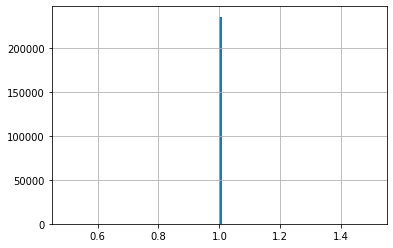

In [51]:
df.ratio=df.fundedamnt/df.loanamnt.astype(float,3)
df.ratio.hist(bins=100)
df[['fundedamnt','loanamnt']][:10]

### Histogram

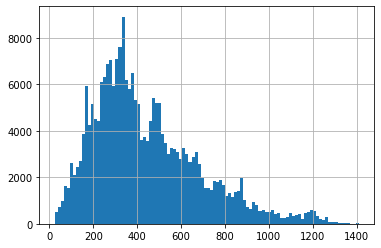

In [52]:
df.installment.hist(bins=100)

##### Mean response

In [53]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [54]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [55]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', 
              "grade", "subgrade", "openacc"]
n = len(dummy_list)

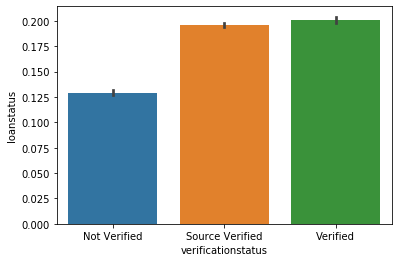

In [56]:
# why verified incomes gives higher default rates?

sns.barplot(x=dummy_list[1], y='loanstatus', data=df)

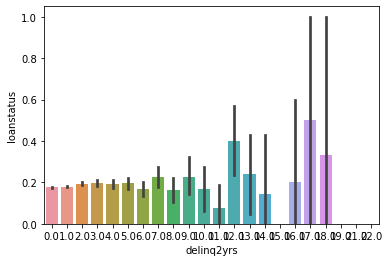

In [57]:
sns.barplot(x=dummy_list[2], y='loanstatus', data=df)

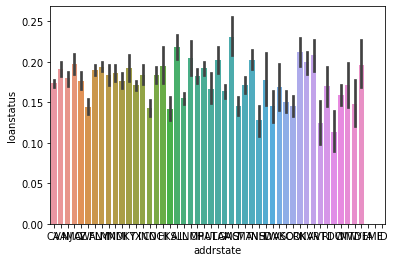

In [58]:
sns.barplot(x=dummy_list[3], y='loanstatus', data=df)

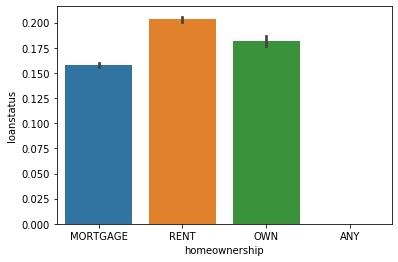

In [59]:
sns.barplot(x=dummy_list[4], y='loanstatus', data=df)

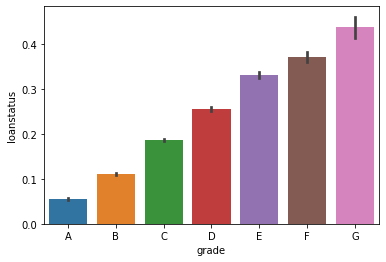

In [60]:
sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [61]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

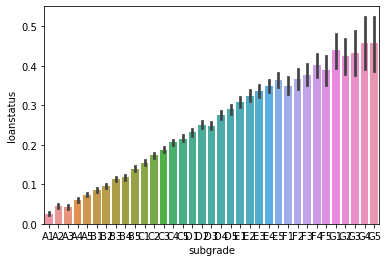

In [62]:
sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

In [63]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.ix[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name )
    fig.savefig('age.jpg')

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


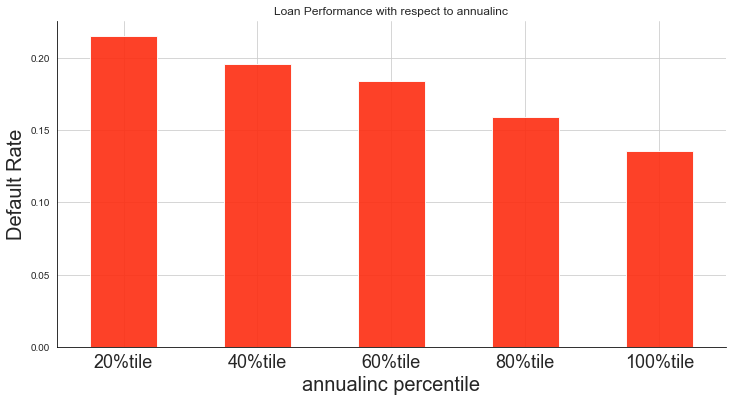

In [64]:
countinuous_variable_plot('annualinc')

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


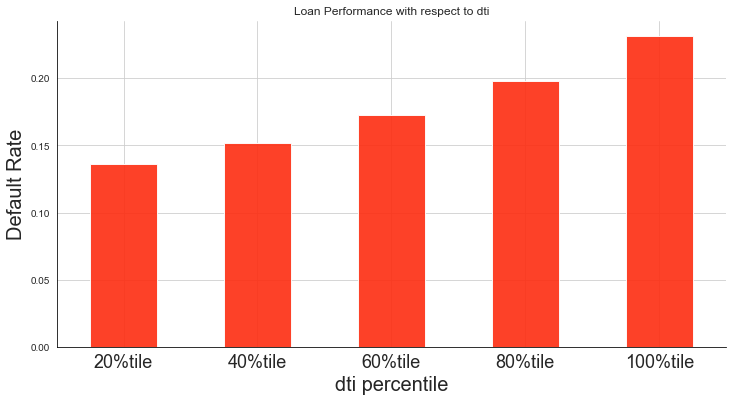

In [65]:
countinuous_variable_plot('dti')

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


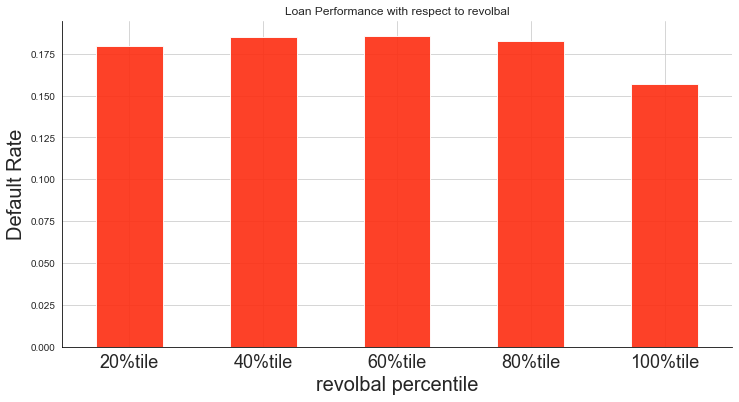

In [66]:
countinuous_variable_plot('revolbal')

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


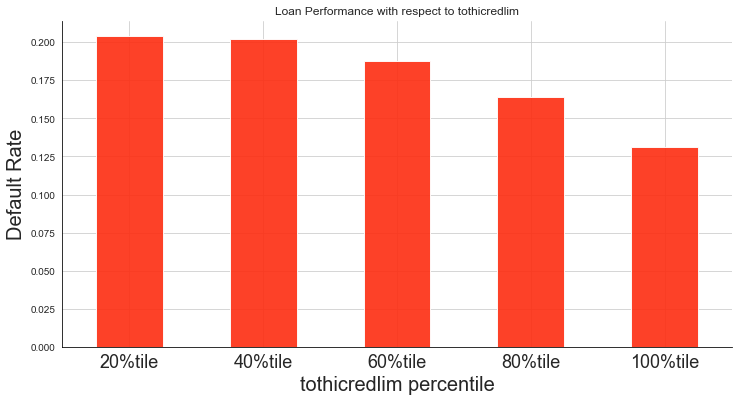

In [67]:
countinuous_variable_plot('tothicredlim')

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


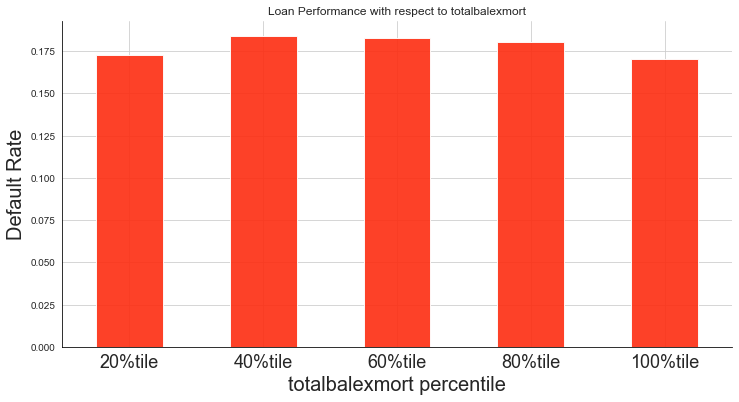

In [68]:
countinuous_variable_plot('totalbalexmort')

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


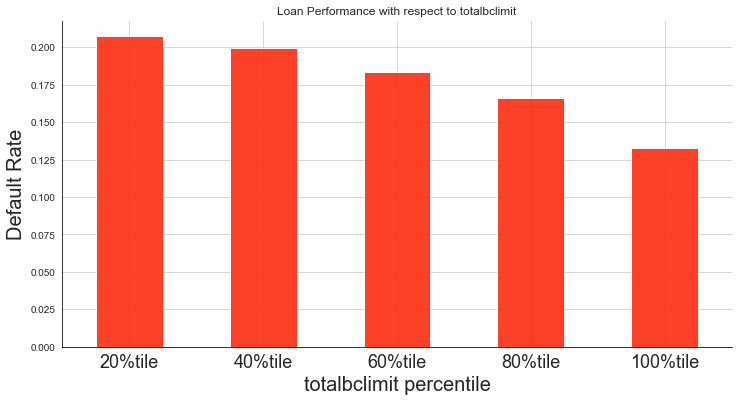

In [69]:
countinuous_variable_plot('totalbclimit')

C:\Users\dhubi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


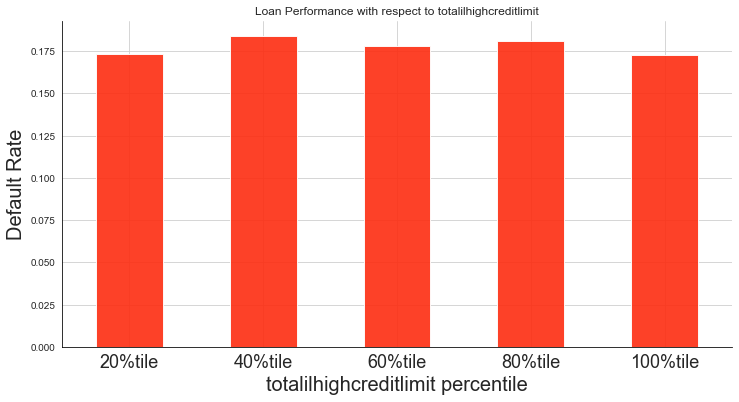

In [70]:
countinuous_variable_plot('totalilhighcreditlimit')

# Prem_Modeling

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
import seaborn as sns

In [72]:
df1 = pd.read_csv('loan_2014.csv')

C:\Users\dhubi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
df1.shape

(235631, 108)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Columns: 108 entries, totalilhighcreditlimit to loanstatus
dtypes: float64(89), object(19)
memory usage: 194.2+ MB


## Select Data

In [75]:
all_null_feature =['inqlast12m',
 'verificationstatusjoint',
 'maxbalbc',
 'annualincjoint',
 'memberid',
 'openil6m',
 'openacc6m',
 'totalbalil',
 'inqfi',
 'mthssincercntil',
 'openrv24m',
 'openrv12m',
 'dtijoint',
 'openil12m',
 'openil24m',
 'allutil',
 'totalcutl',
 'ilutil']

In [76]:
ob_feature=['initialliststatus',
 'grade',
 'subgrade',
 'earliestcrline',
 'applicationtype',
 'intrate',
 'desc',
 'term',
 'homeownership',
 'addrstate',
 'revolutil',
 'id',
 'zipcode',
 'verificationstatus',
 'emptitle',
 'emplength',
 'purpose',
 'issued',
 'loanstatus']

In [77]:
num_feature=['bcopentobuy', 'numactvbctl', 'mthssincelastrecord', 'totcurbal', 'totalbalexmort', 'mosinrcnttl', 'mortacc', 'mthssincelastdelinq', 'numactvrevtl', 'tothicredlim', 'ficorangehigh', 'bcutil', 'numbctl', 'totalrevhilim', 'totcollamt', 'numtl120dpd2m', 'ficorangelow', 'totalacc', 'mthssincerecentbcdlq', 'installment', 'numrevaccts', 'pubrec', 'accopenpast24mths', 'numoprevtl', 'avgcurbal', 'dti', 'delinq2yrs', 'fundedamnt', 'mosinoldilacct', 'annualinc', 'numtl30dpd', 'loanamnt', 'numsats', 'mthssincerecentrevoldelinq', 'mthssincerecentbc', 'revolbal', 'inqlast6mths', 'totalilhighcreditlimit', 'collections12mthsexmed', 'chargeoffwithin12mths', 'numtl90gdpd24m', 'delinqamnt', 'mosinoldrevtlop', 'taxliens', 'numbcsats', 'totalbclimit', 'numacctsever120pd', 'accnowdelinq', 'pcttlnvrdlq', 'mthssincerecentinq', 'numiltl', 'mosinrcntrevtlop', 'openacc', 'numrevtlbalgt0', 'mthssincelastmajorderog', 'numtloppast12m', 'percentbcgt75', 'pubrecbankruptcies']

In [78]:
select_feature=ob_feature+num_feature
len(select_feature)

77

In [79]:
# remove applicationtype since it only has one value as 'individual'

ob_feature.remove('applicationtype')

In [80]:
# remove fundedamnt since it always equals to 1 for issued loans and varied during different time of a current loan

num_feature.remove('fundedamnt')

In [81]:
# remove 'id','issued' and 'loanstatus' from ob_feature, since they are index, train/test flag and target
ob_feature.remove('id')
ob_feature.remove('loanstatus')
ob_feature.remove('issued')#我们要做in time 和 out of time， 我们用 out of time

In [82]:
# remove 'desc' from ob_feature and select_feature
ob_feature.remove('desc')#不需要自然语言处理

In [83]:
select_feature=ob_feature+num_feature
len(select_feature)

71

In [84]:
# selected features left and delete the last two rows
df=df1[select_feature+['id','loanstatus','issued']][:-2]

In [85]:
df.shape

(235629, 74)

## only use term=36 months and loanstatus = fully paid and charged off

In [86]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [87]:
df = df.query("term ==' 36 months'")

In [88]:
df.shape

(162570, 74)

In [89]:
ob_feature.remove('term')

## Label Target

In [90]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [91]:
print(df.loanstatus.value_counts())
print(df.loanstatus.value_counts(normalize=True))

0    140255
1     22315
Name: loanstatus, dtype: int64
0    0.862736
1    0.137264
Name: loanstatus, dtype: float64


## Out of time testing set and in-time training set: Oct~Dec as test)

In [92]:
issued=list(df['issued'].unique())
issued

['Dec-2014',
 'Nov-2014',
 'Oct-2014',
 'Sep-2014',
 'Aug-2014',
 'Jul-2014',
 'Jun-2014',
 'May-2014',
 'Apr-2014',
 'Mar-2014',
 'Feb-2014',
 'Jan-2014']

In [93]:
df['train_flg'] = df.issued.apply(lambda x: 0 if x in issued[:3] else 1)#January - September is train, the rest is test
df.train_flg.value_counts()

1    112550
0     50020
Name: train_flg, dtype: int64

## Feature Engineering & Cleaning

#### Datetime to numeric feature

In [94]:
df.earliestcrline.unique()[:5]

array(['Sep-1989', 'Nov-1992', 'Aug-2002', 'Oct-1998', 'Jan-1999'],
      dtype=object)

In [95]:
# convert to number of months to Dec 2014
cl_month=df.earliestcrline.apply(lambda x: x.split('-')[0])
cl_year=df.earliestcrline.apply(lambda x: int(x.split('-')[1]))

In [96]:
cl_month.unique()

array(['Sep', 'Nov', 'Aug', 'Oct', 'Jan', 'May', 'Jul', 'Dec', 'Jun',
       'Mar', 'Feb', 'Apr'], dtype=object)

In [97]:
cl_year.unique()

array([1989, 1992, 2002, 1998, 1999, 2001, 2009, 2003, 1993, 1996, 1995,
       2010, 2006, 2007, 2011, 2004, 2008, 1997, 1988, 1994, 2000, 1984,
       1991, 1985, 1987, 2005, 1986, 1973, 1982, 1974, 1979, 1976, 1983,
       1978, 1981, 1990, 1980, 1977, 1969, 1971, 1967, 1972, 1968, 1962,
       1975, 1965, 1966, 1963, 1970, 1964, 1958, 1955, 1959, 1961, 1960,
       1954, 1957, 1949, 1950, 1948, 1953, 1956], dtype=int64)

In [98]:
dic_month= {'Jan':11,'Feb':10,'Mar':9,'Apr':8, 'May':7, 'Jun':6, 'Jul':5, 'Aug':4, 'Sep':3, 'Oct':2, 'Nov':1, 'Dec':0}

In [99]:
# Convert the year and month to months
df['earliestcrline_month']=df.earliestcrline.apply(lambda x: (2014-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])

In [100]:
df.earliestcrline_month[:5]

0    303
2    265
5    148
6    194
7    191
Name: earliestcrline_month, dtype: int64

In [101]:
num_feature.append('earliestcrline_month')
ob_feature.remove('earliestcrline')

In [102]:
print(len(ob_feature), len(num_feature))

12 58


### emplength to numeric feature

In [103]:
# Employ length
print(df['emplength'].isnull().sum())
df['emplength'].unique()

9646


array(['8 years', '10+ years', '< 1 year', '2 years', '7 years',
       '9 years', '4 years', nan, '1 year', '5 years', '3 years',
       '6 years'], dtype=object)

In [104]:
df['emplength'].replace('n/a', np.nan, inplace=True)
df['emplength'].replace('< 1 year', '0', inplace=True)
df['emplength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df.emplength.fillna(value=-999,inplace=True)
df['emplength'] = df['emplength'].astype(int)

In [105]:
df.emplength.value_counts()

 10     51146
 2      14669
 3      13106
 0      13056
 1      10571
 4       9670
-999     9646
 5       9148
 7       8946
 6       8205
 8       8131
 9       6276
Name: emplength, dtype: int64

In [106]:
num_feature.append('emplength')
ob_feature.remove('emplength')
print(len(num_feature), len(ob_feature))

59 11


## % to numeric feature: intrate, revolutil

In [107]:
# Remove % sign and convert to numeric
intrate=df.intrate.apply(lambda x: float(x.replace('%','')))

In [108]:
df.intrate=intrate
df.intrate[:2]

0     6.99
2    13.66
Name: intrate, dtype: float64

In [109]:
df.revolutil[:3]

0    31.6%
2    59.4%
5    91.9%
Name: revolutil, dtype: object

In [110]:
revolutil=df.revolutil.apply(lambda x: str(x).replace('%','')).astype(float)

In [111]:
df.revolutil=revolutil
df.revolutil[:2]

0    31.6
2    59.4
Name: revolutil, dtype: float64

In [112]:
ob_feature.remove('intrate')
num_feature.append('intrate')
ob_feature.remove('revolutil')
num_feature.append('revolutil')

In [113]:
print(len(ob_feature), len(num_feature))

9 61


#### Ordinal feature encoding : grade, subgrade

In [114]:
# Coarse scale:1-7, fine scale:1-35
Dic_grade = {"A": 1, 
            "B": 2, 
            "C": 3, 
            "D": 4, 
            "E": 5,
            "F": 6, 
            "G": 7}

In [115]:
df.grade = df.grade.map(Dic_grade)

In [116]:
df.subgrade = df.subgrade.apply(lambda x: (Dic_grade[x[0]] - 1) * 5 + int(x[1]))

In [117]:
ob_feature.remove('grade')
num_feature.append('grade')
ob_feature.remove('subgrade')
num_feature.append('subgrade')

In [118]:
print(len(ob_feature), len(num_feature))

7 63


### High cardinality feature encoding

###### Zip Code - frequency encoding 

In [119]:
print(df.zipcode.nunique(), df.zipcode.unique()[:5])

854 ['937xx' '077xx' '850xx' '982xx' '331xx']


In [120]:
# convert zipcode to int
df.zipcode = df.zipcode.apply(lambda x: int(x[0:3]))

In [121]:
df.zipcode[:5]

0    937
2     77
5    850
6    982
7    331
Name: zipcode, dtype: int64

In [122]:
zipcode_freq = df.groupby("zipcode").size().reset_index() # Frequency encoding

In [123]:
zipcode_freq[:5]

,zipcode,0
0,8,1
1,10,229
2,11,66
3,12,69
4,13,41


In [124]:
zipcode_freq.columns = ["zipcode", "zipcode_freq"]

In [125]:
df = pd.merge(df, zipcode_freq, how = "left", on = "zipcode")

In [126]:
df.zipcode_freq[:5]

0     243
1     365
2     735
3     449
4    1415
Name: zipcode_freq, dtype: int64

In [127]:
ob_feature.remove('zipcode')
num_feature.append('zipcode')
num_feature.append('zipcode_freq')
print(len(ob_feature), len(num_feature))

6 65


### emptitle-frequency encoding (can do some NLP for later stage)

In [128]:
emptitle_freq = df.groupby("emptitle").size().reset_index()
emptitle_freq.columns = ["emptitle", "emptitle_freq"]
df = pd.merge(df, emptitle_freq, how = "left", on = "emptitle")

In [129]:
ob_feature.remove('emptitle')
num_feature.append('emptitle_freq')
print(len(ob_feature), len(num_feature))

5 66


###### Addr_state - frequency encoding

In [130]:
addrstate_freq = df.groupby("addrstate").size().reset_index()
addrstate_freq.columns = ["addrstate", "addrstate_freq"]
df = pd.merge(df, addrstate_freq, how = "left", on = "addrstate")

In [131]:
ob_feature.remove('addrstate')
num_feature.append('addrstate_freq')
print(len(ob_feature), len(num_feature))

4 67


#### One hot encoding

In [132]:
dummy_feature = ["homeownership", "verificationstatus", "purpose", "initialliststatus"]

In [133]:
df_dummy = pd.get_dummies(df[dummy_feature])

In [134]:
OHE_feature=list(df_dummy.columns.values)

In [135]:
len(OHE_feature)

22

In [136]:
df=pd.concat([df,df_dummy], axis=1 )

In [137]:
df.shape

(162570, 101)

In [138]:
for feat in dummy_feature:
    
    ob_feature.remove(feat)

In [139]:
len(ob_feature)

0

In [140]:
select_feature=num_feature+OHE_feature

In [141]:
len(select_feature)

89

##  XGBoost 

In [142]:
feat=select_feature
print(feat)

['bcopentobuy', 'numactvbctl', 'mthssincelastrecord', 'totcurbal', 'totalbalexmort', 'mosinrcnttl', 'mortacc', 'mthssincelastdelinq', 'numactvrevtl', 'tothicredlim', 'ficorangehigh', 'bcutil', 'numbctl', 'totalrevhilim', 'totcollamt', 'numtl120dpd2m', 'ficorangelow', 'totalacc', 'mthssincerecentbcdlq', 'installment', 'numrevaccts', 'pubrec', 'accopenpast24mths', 'numoprevtl', 'avgcurbal', 'dti', 'delinq2yrs', 'mosinoldilacct', 'annualinc', 'numtl30dpd', 'loanamnt', 'numsats', 'mthssincerecentrevoldelinq', 'mthssincerecentbc', 'revolbal', 'inqlast6mths', 'totalilhighcreditlimit', 'collections12mthsexmed', 'chargeoffwithin12mths', 'numtl90gdpd24m', 'delinqamnt', 'mosinoldrevtlop', 'taxliens', 'numbcsats', 'totalbclimit', 'numacctsever120pd', 'accnowdelinq', 'pcttlnvrdlq', 'mthssincerecentinq', 'numiltl', 'mosinrcntrevtlop', 'openacc', 'numrevtlbalgt0', 'mthssincelastmajorderog', 'numtloppast12m', 'percentbcgt75', 'pubrecbankruptcies', 'earliestcrline_month', 'emplength', 'intrate', 'revo

### Preliminary manually parameter tuning based on stratified train-test split

In [143]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
#Kfolds = StratifiedKFold(df_all['loan_status'], n_folds = 3, shuffle=True, random_state=2019)

In [144]:
df_train = df.query("train_flg == 1")
df_test =df.query("train_flg == 0" )

In [145]:
print(df_train.shape, df_test.shape)

(112550, 101) (50020, 101)


In [146]:
df_train[feat].shape

(112550, 89)

In [147]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train[feat], df_train.loanstatus, 
                                                      test_size=0.3, random_state=2014, stratify = df_train.loanstatus )

In [148]:
X_test, y_test = df_test[feat], df_test.loanstatus

In [149]:
dtrain = xgb.DMatrix(X_train, y_train, missing = np.NAN)
dvalid = xgb.DMatrix(X_valid, y_valid, missing = np.NAN)
dtest = xgb.DMatrix(X_test, y_test, missing = np.NAN)

C:\Users\dhubi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dhubi\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [150]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.632, 
          "colsample_bytree": 0.7,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": "auc",
          #"gamma": 1, 
          "min_child_weight": 5} 

In [151]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.671653	eval-auc:0.654708
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.683426	eval-auc:0.665408
[2]	train-auc:0.689948	eval-auc:0.668134
[3]	train-auc:0.691981	eval-auc:0.670223
[4]	train-auc:0.694847	eval-auc:0.67259
[5]	train-auc:0.697563	eval-auc:0.673311
[6]	train-auc:0.698981	eval-auc:0.673664
[7]	train-auc:0.700344	eval-auc:0.673932
[8]	train-auc:0.701704	eval-auc:0.674462
[9]	train-auc:0.702769	eval-auc:0.675227
[10]	train-auc:0.703292	eval-auc:0.675861
[11]	train-auc:0.703551	eval-auc:0.676188
[12]	train-auc:0.703961	eval-auc:0.676876
[13]	train-auc:0.704778	eval-auc:0.677121
[14]	train-auc:0.705963	eval-auc:0.67734
[15]	train-auc:0.706727	eval-auc:0.677928
[16]	train-auc:0.707309	eval-auc:0.677762
[17]	train-auc:0.707756	eval-auc:0.678521
[18]	train-auc:0.708038	eval-auc:0.678381
[19]	train-auc:0.708755	eval-auc:0.678994
[20]	train-auc:0.70943	eval-auc

[191]	train-auc:0.791733	eval-auc:0.691769
[192]	train-auc:0.791819	eval-auc:0.691723
[193]	train-auc:0.792104	eval-auc:0.691764
[194]	train-auc:0.792356	eval-auc:0.691769
[195]	train-auc:0.792748	eval-auc:0.691807
[196]	train-auc:0.793116	eval-auc:0.691791
[197]	train-auc:0.793594	eval-auc:0.691811
[198]	train-auc:0.793754	eval-auc:0.691872
[199]	train-auc:0.794206	eval-auc:0.691901
[200]	train-auc:0.794608	eval-auc:0.691847
[201]	train-auc:0.794803	eval-auc:0.691847
[202]	train-auc:0.794967	eval-auc:0.691843
[203]	train-auc:0.795317	eval-auc:0.691919
[204]	train-auc:0.795648	eval-auc:0.69203
[205]	train-auc:0.796278	eval-auc:0.691998
[206]	train-auc:0.796813	eval-auc:0.691949
[207]	train-auc:0.797001	eval-auc:0.691835
[208]	train-auc:0.797181	eval-auc:0.691914
[209]	train-auc:0.797536	eval-auc:0.691929
[210]	train-auc:0.797865	eval-auc:0.691973
[211]	train-auc:0.798172	eval-auc:0.691996
[212]	train-auc:0.798486	eval-auc:0.691984
[213]	train-auc:0.798702	eval-auc:0.691931
[214]	train-

In [152]:
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets
import pylab as pl
def draw_ROC(model, dtrain, dvalid, dtest, y_train, y_valid, y_test ):
    probas_ = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    probas_1 = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
    probas_2 = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    fpr, tpr, thresholds = roc_curve(y_valid, probas_)
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, probas_2)
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    print("Area under the ROC curve - validation: %f" % roc_auc)
    print("Area under the ROC curve - train: %f" % roc_auc_1)
    print("Area under the ROC curve - test: %f" % roc_auc_2)
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - test(AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot(fpr_2, tpr_2, label='ROC curve - train (AUC = %0.2f)' % roc_auc_2, color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()


### ROC curve

Area under the ROC curve - validation: 0.692030
Area under the ROC curve - train: 0.795648
Area under the ROC curve - test: 0.696198


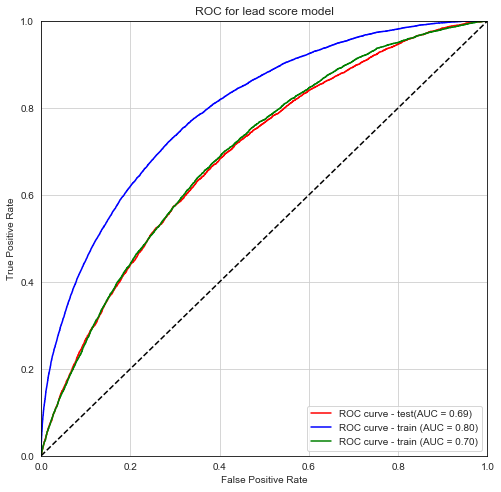

In [153]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

### Distribution of predicted values

In [154]:
y_pred = gbm.predict(dtest)

In [155]:
print(y_pred.max(), y_pred.min(), y_pred.mean())

0.71676356 0.0054967874 0.13638511


### Feature importance

In [156]:
importance=gbm.get_fscore()
print(importance)
print(type(importance))

{'subgrade': 179, 'annualinc': 338, 'mosinoldilacct': 373, 'mthssincelastmajorderog': 145, 'dti': 465, 'numrevtlbalgt0': 85, 'zipcode_freq': 241, 'accopenpast24mths': 189, 'emplength': 149, 'installment': 343, 'addrstate_freq': 151, 'numiltl': 154, 'mosinoldrevtlop': 317, 'earliestcrline_month': 226, 'revolbal': 256, 'bcutil': 292, 'emptitle_freq': 293, 'totcurbal': 200, 'mthssincerecentbc': 285, 'mthssincerecentbcdlq': 171, 'tothicredlim': 234, 'homeownership_RENT': 58, 'mthssincerecentinq': 223, 'numactvbctl': 59, 'mthssincelastrecord': 165, 'intrate': 270, 'totalrevhilim': 256, 'totalacc': 149, 'mthssincelastdelinq': 181, 'totcollamt': 91, 'mosinrcntrevtlop': 156, 'openacc': 45, 'numsats': 79, 'purpose_small_business': 17, 'bcopentobuy': 278, 'numtloppast12m': 70, 'collections12mthsexmed': 5, 'pcttlnvrdlq': 133, 'verificationstatus_Verified': 16, 'avgcurbal': 305, 'loanamnt': 200, 'totalbalexmort': 202, 'mortacc': 73, 'revolutil': 239, 'numoprevtl': 74, 'homeownership_MORTGAGE': 17,

In [157]:
df_importance = pd.DataFrame.from_dict(importance,orient='index')#, columns=['feature', 'fscore'])
df_importance = df_importance.reset_index()
df_importance.columns=['feature','fscore']
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [158]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance # Draw back in feature importance, 
#if you have more values in one catergory, it will be usd more frequently, it seems more important
# So subgrade seems more important than grade
# Purpose_small_business seems not that important, but it is actually important.

,feature,fscore
4,dti,0.044101
2,mosinoldilacct,0.035376
9,installment,0.032530
1,annualinc,0.032056
12,mosinoldrevtlop,0.030064
...,...,...
79,accnowdelinq,0.000285
74,purpose_major_purchase,0.000190
78,delinqamnt,0.000190
80,purpose_vacation,0.000190


<Figure size 2304x2304 with 0 Axes>

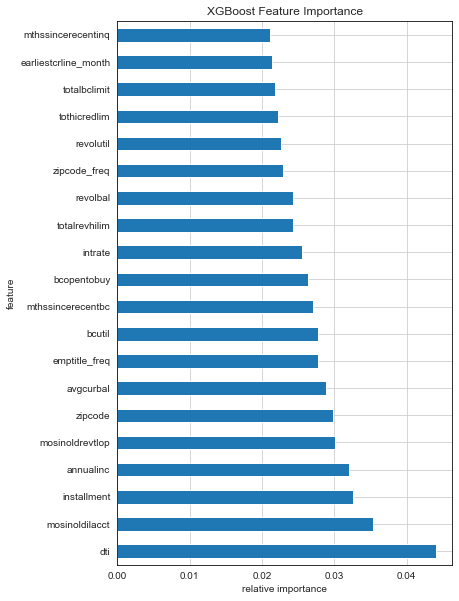

In [159]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

Text(0.5, 0, 'relative importance')

<Figure size 2304x2304 with 0 Axes>

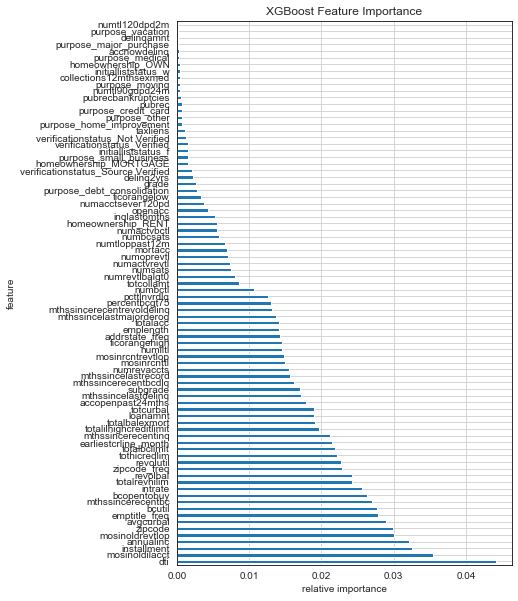

In [160]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

## Hyperparameter Tuning - Bayesian Optimization

In [161]:
from bayes_opt import BayesianOptimization

train_x = df_train[feat]
train_y = df_train.loanstatus

xgtrain = xgb.DMatrix(train_x, label=train_y, missing = np.NAN)  

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma):
    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.05
    params['max_depth'] = int(max_depth )   
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = False 



    cv_result = xgb.cv(params, xgtrain,
                       num_boost_round=100000,
                       nfold=3,
                       metrics={'auc'},
                       seed=1234,
                       callbacks=[xgb.callback.early_stop(50)])
    print(cv_result)

    return cv_result['test-auc-mean'].max()


xgb_BO = BayesianOptimization(xgb_evaluate, 
                             {'max_depth': (4, 8),
                              'min_child_weight': (0, 20),
                              'colsample_bytree': (0.2, 0.8),
                              'subsample': (0.5, 1),
                              'gamma': (0, 2)
                             }
                            )

xgb_BO.maximize(init_points=5, n_iter=40)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[149]	train-auc:0.815274+0.00257935	test-auc:0.688152+0.00256905

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.686635       0.002580       0.652158      0.004236
1          0.700230       0.003234       0.663135      0.003741
2          0.706443       0.003438       0.666720      0.004012
3          0.711020       0.003251       0.669145      0.003948
4          0.713820       0.003526       0.670353      0.003750
..              ...            ...            ...           ...
145        0.813376       0.002364       0.688046      0.002637
146        0.813845       0.002406       0.688078      0.002602
147        0.814484

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[417]	train-auc:0.751488+0.00109841	test-auc:0.691384+0.00270066

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.656239       0.002102       0.651455      0.002756
1          0.665226       0.001855       0.659217      0.002298
2          0.669683       0.003252       0.663004      0.002245
3          0.671844       0.003409       0.665469      0.003318
4          0.672909       0.002139       0.665987      0.003308
..              ...            ...            ...           ...
413        0.751030       0.001100       0.691331      0.002717
414        0.751149       0.001128       0.691344      0.002716
415        0.751275       0.001150       0.691326      0.002720
416        0.751388       0.001108       0.691358      0.002716
417        0.751488       0.001098       0.691384      0.002701

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[336]	train-auc:0.747082+0.00123822	test-auc:0.690658+0.00296863

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.658119       0.002410       0.651150      0.004156
1          0.667420       0.002442       0.659010      0.002638
2          0.670755       0.002496       0.662259      0.003124
3          0.672238       0.002061       0.664301      0.003863
4          0.672938       0.002119       0.664892      0.003675
..              ...            ...            ...           ...
332        0.746526       0.001229       0.690588      0.002989
333        0.746711       0.001234       0.690571      0.002975
334        0.746847       0.001244       0.690601      0.002999
335        0.746978       0.001208       0.690640      0.002984
336        0.747082       0.001238       0.690658      0.002969

[337 rows x 4 columns]
|  15       |  0.6907   |  0.7072   |  0.06149  |  4.055    

Stopping. Best iteration:
[341]	train-auc:0.747109+0.00107385	test-auc:0.690751+0.00278334

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.657917       0.001877       0.650790      0.003288
1          0.667598       0.001619       0.658831      0.002613
2          0.671048       0.002215       0.663219      0.003634
3          0.672421       0.001655       0.664823      0.003203
4          0.673475       0.001992       0.665864      0.003163
..              ...            ...            ...           ...
337        0.746530       0.001126       0.690691      0.002857
338        0.746686       0.001085       0.690742      0.002814
339        0.746840       0.001129       0.690731      0.002817
340        0.746982       0.001109       0.690749      0.002771
341        0.747109       0.001074       0.690751      0.002783

[342 rows x 4 columns]
|  22       |  0.6908   |  0.7965   |  1.911    |  4.006    |  19.84    |  0.5257   |
Multiple eval metrics have bee

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.661120       0.002673       0.653202      0.004440
1          0.669605       0.001754       0.662020      0.004973
2          0.671379       0.001880       0.663452      0.005921
3          0.672768       0.001579       0.664453      0.005691
4          0.674010       0.001624       0.665715      0.005383
..              ...            ...            ...           ...
361        0.751868       0.000635       0.689976      0.002915
362        0.752021       0.000675       0.689995      0.002879
363        0.752152       0.000641       0.689979      0.002875
364        0.752279       0.000629       0.690031      0.002876
365        0.752370       0.000609       0.690048      0.002879

[366 rows x 4 columns]
|  29       |  0.69     |  0.7212   |  0.03275  |  4.026    |  19.93    |  0.9177   |
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't impr

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[479]	train-auc:0.76035+0.00055741	test-auc:0.690943+0.00304292

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.657626       0.002305       0.650036      0.001878
1          0.666208       0.003133       0.659596      0.001335
2          0.669745       0.004073       0.662160      0.002136
3          0.671929       0.003858       0.664131      0.002014
4          0.673309       0.003323       0.665083      0.002705
..              ...            ...            ...           ...
475        0.759937       0.000517       0.690932      0.003087
476        0.760076       0.000532       0.690906      0.003040
477        0.760213       0.000540       0.690929      0.003038
478        0.760290       0.000514       0.690921      0.003018
479        0.760350       0.000557       0.690943      0.003043


Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[336]	train-auc:0.749035+0.00119157	test-auc:0.690855+0.00277755

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.660650       0.002132       0.654070      0.004638
1          0.669166       0.002517       0.661030      0.003374
2          0.671420       0.002615       0.663172      0.004073
3          0.672859       0.001957       0.664169      0.004119
4          0.673960       0.001642       0.665068      0.004434
..              ...            ...            ...           ...
332        0.748436       0.001270       0.690759      0.002791
333        0.748585       0.001229       0.690768      0.002810
334        0.748746       0.001192       0.690798      0.002802
335        0.748925       0.001184       0.690851      0.002792
336        0.749035       0.001192       0.690855      0.002778

[337 rows x 4 columns]
|  44       |  0.6909   |  0.7664   |  1.949    |  4.034    

In [162]:
## Tuning results: Find the first three and average
xgb_BO_scores = pd.DataFrame(xgb_BO.res)
xgb_BO_scores = xgb_BO_scores.sort_values(by='target',ascending=False)
pd.set_option('display.max_colwidth', -1)
xgb_BO_scores.head(3)

,target,params
7,0.691384,"{'colsample_bytree': 0.2885951504657417, 'gamma': 1.7564338522427516, 'max_depth': 4.020874681963951, 'min_child_weight': 19.958192860632344, 'subsample': 0.744515458900939}"
42,0.691212,"{'colsample_bytree': 0.4173049089680966, 'gamma': 1.957978315759195, 'max_depth': 4.056792308388528, 'min_child_weight': 19.925435036797342, 'subsample': 0.8341158248150704}"
16,0.691176,"{'colsample_bytree': 0.20216889976859764, 'gamma': 0.05345798698118376, 'max_depth': 4.071373931515145, 'min_child_weight': 19.904224673483405, 'subsample': 0.5958355915069207}"


In [163]:
params = xgb_BO.max['params']
print(params)

{'colsample_bytree': 0.2885951504657417, 'gamma': 1.7564338522427516, 'max_depth': 4.020874681963951, 'min_child_weight': 19.958192860632344, 'subsample': 0.744515458900939}


In [164]:
%%time
# parameter set 1
params = {'objective': 'binary:logistic'
                  , 'booster': 'gbtree'
                  , 'eta': 0.01
                  , 'max_depth': 4     
                  , 'min_child_weight': 20   #18   
                  , 'subsample': 0.7156171417332451 #0.74657   
                  , 'colsample_bytree': 0.23587812307735756 #0.261858  
                  , 'gamma': 0.0365610193470598 #0.57485               
                  , 'seed': 1234
                  , 'nthread': -1
                  , 'silence': 1
                  , 'eval_metric': 'auc'
                  , 'scale_pos_weight': 1}

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round=10000
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=50)

# [3393]	train-auc:0.772549	eval-auc:0.728445

[0]	train-auc:0.656307	eval-auc:0.657759
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.661033	eval-auc:0.663371
[2]	train-auc:0.662504	eval-auc:0.664758
[3]	train-auc:0.664566	eval-auc:0.663167
[4]	train-auc:0.671957	eval-auc:0.668366
[5]	train-auc:0.67385	eval-auc:0.669389
[6]	train-auc:0.673775	eval-auc:0.670429
[7]	train-auc:0.674722	eval-auc:0.671221
[8]	train-auc:0.674478	eval-auc:0.672426
[9]	train-auc:0.674008	eval-auc:0.672984
[10]	train-auc:0.674068	eval-auc:0.673362
[11]	train-auc:0.674657	eval-auc:0.674162
[12]	train-auc:0.674256	eval-auc:0.674058
[13]	train-auc:0.674538	eval-auc:0.674397
[14]	train-auc:0.676704	eval-auc:0.675783
[15]	train-auc:0.678409	eval-auc:0.676711
[16]	train-auc:0.679599	eval-auc:0.67723
[17]	train-auc:0.680604	eval-auc:0.678144
[18]	train-auc:0.680515	eval-auc:0.678266
[19]	train-auc:0.681407	eval-auc:0.678581
[20]	train-auc:0.682567	eval-au

[191]	train-auc:0.68921	eval-auc:0.682222
[192]	train-auc:0.689153	eval-auc:0.682188
[193]	train-auc:0.689153	eval-auc:0.682208
[194]	train-auc:0.689145	eval-auc:0.682148
[195]	train-auc:0.689201	eval-auc:0.682124
[196]	train-auc:0.689339	eval-auc:0.682212
[197]	train-auc:0.689304	eval-auc:0.682238
[198]	train-auc:0.689438	eval-auc:0.682282
[199]	train-auc:0.689599	eval-auc:0.682364
[200]	train-auc:0.689616	eval-auc:0.682317
[201]	train-auc:0.689732	eval-auc:0.682338
[202]	train-auc:0.689734	eval-auc:0.682358
[203]	train-auc:0.689702	eval-auc:0.68234
[204]	train-auc:0.689695	eval-auc:0.682335
[205]	train-auc:0.689811	eval-auc:0.682382
[206]	train-auc:0.689964	eval-auc:0.682426
[207]	train-auc:0.689924	eval-auc:0.682401
[208]	train-auc:0.689899	eval-auc:0.682392
[209]	train-auc:0.690009	eval-auc:0.682469
[210]	train-auc:0.690021	eval-auc:0.682481
[211]	train-auc:0.690086	eval-auc:0.682529
[212]	train-auc:0.690052	eval-auc:0.682566
[213]	train-auc:0.690123	eval-auc:0.682625
[214]	train-a

[383]	train-auc:0.697388	eval-auc:0.686766
[384]	train-auc:0.697447	eval-auc:0.686777
[385]	train-auc:0.697503	eval-auc:0.686815
[386]	train-auc:0.697577	eval-auc:0.686859
[387]	train-auc:0.697597	eval-auc:0.68685
[388]	train-auc:0.697638	eval-auc:0.686849
[389]	train-auc:0.697682	eval-auc:0.68686
[390]	train-auc:0.697714	eval-auc:0.686888
[391]	train-auc:0.697791	eval-auc:0.686938
[392]	train-auc:0.697806	eval-auc:0.68694
[393]	train-auc:0.697875	eval-auc:0.686966
[394]	train-auc:0.697906	eval-auc:0.686962
[395]	train-auc:0.697941	eval-auc:0.686959
[396]	train-auc:0.697951	eval-auc:0.686963
[397]	train-auc:0.697996	eval-auc:0.686999
[398]	train-auc:0.698049	eval-auc:0.687019
[399]	train-auc:0.698067	eval-auc:0.687033
[400]	train-auc:0.698157	eval-auc:0.687055
[401]	train-auc:0.698216	eval-auc:0.687066
[402]	train-auc:0.698273	eval-auc:0.687091
[403]	train-auc:0.69835	eval-auc:0.687093
[404]	train-auc:0.698413	eval-auc:0.687112
[405]	train-auc:0.698448	eval-auc:0.68711
[406]	train-auc:

[575]	train-auc:0.705836	eval-auc:0.690267
[576]	train-auc:0.7059	eval-auc:0.690312
[577]	train-auc:0.705961	eval-auc:0.690331
[578]	train-auc:0.706013	eval-auc:0.690345
[579]	train-auc:0.706053	eval-auc:0.690355
[580]	train-auc:0.706071	eval-auc:0.69035
[581]	train-auc:0.706104	eval-auc:0.690361
[582]	train-auc:0.706166	eval-auc:0.690394
[583]	train-auc:0.706202	eval-auc:0.690407
[584]	train-auc:0.706265	eval-auc:0.690425
[585]	train-auc:0.706312	eval-auc:0.690432
[586]	train-auc:0.706334	eval-auc:0.690435
[587]	train-auc:0.706374	eval-auc:0.690425
[588]	train-auc:0.706431	eval-auc:0.690442
[589]	train-auc:0.706453	eval-auc:0.690464
[590]	train-auc:0.706492	eval-auc:0.690489
[591]	train-auc:0.706534	eval-auc:0.6905
[592]	train-auc:0.706563	eval-auc:0.690507
[593]	train-auc:0.706607	eval-auc:0.690517
[594]	train-auc:0.706661	eval-auc:0.690548
[595]	train-auc:0.706706	eval-auc:0.690579
[596]	train-auc:0.706755	eval-auc:0.690603
[597]	train-auc:0.706808	eval-auc:0.690618
[598]	train-auc:

[767]	train-auc:0.713007	eval-auc:0.692122
[768]	train-auc:0.713041	eval-auc:0.692121
[769]	train-auc:0.713076	eval-auc:0.692131
[770]	train-auc:0.713094	eval-auc:0.692129
[771]	train-auc:0.713146	eval-auc:0.692123
[772]	train-auc:0.713187	eval-auc:0.692136
[773]	train-auc:0.713225	eval-auc:0.692154
[774]	train-auc:0.713262	eval-auc:0.69214
[775]	train-auc:0.713292	eval-auc:0.692149
[776]	train-auc:0.713319	eval-auc:0.692153
[777]	train-auc:0.713359	eval-auc:0.692171
[778]	train-auc:0.713381	eval-auc:0.692168
[779]	train-auc:0.713414	eval-auc:0.692194
[780]	train-auc:0.713448	eval-auc:0.692213
[781]	train-auc:0.713481	eval-auc:0.692217
[782]	train-auc:0.713494	eval-auc:0.692217
[783]	train-auc:0.713524	eval-auc:0.692228
[784]	train-auc:0.713566	eval-auc:0.692223
[785]	train-auc:0.713598	eval-auc:0.692235
[786]	train-auc:0.713647	eval-auc:0.692256
[787]	train-auc:0.713657	eval-auc:0.69225
[788]	train-auc:0.71369	eval-auc:0.692242
[789]	train-auc:0.713724	eval-auc:0.692238
[790]	train-au

[959]	train-auc:0.718877	eval-auc:0.693372
[960]	train-auc:0.718908	eval-auc:0.693382
[961]	train-auc:0.718924	eval-auc:0.693389
[962]	train-auc:0.718976	eval-auc:0.693399
[963]	train-auc:0.719025	eval-auc:0.69341
[964]	train-auc:0.719072	eval-auc:0.693425
[965]	train-auc:0.7191	eval-auc:0.693434
[966]	train-auc:0.719119	eval-auc:0.693455
[967]	train-auc:0.71915	eval-auc:0.693467
[968]	train-auc:0.719181	eval-auc:0.693479
[969]	train-auc:0.719193	eval-auc:0.693476
[970]	train-auc:0.719234	eval-auc:0.693484
[971]	train-auc:0.719269	eval-auc:0.693504
[972]	train-auc:0.719289	eval-auc:0.693519
[973]	train-auc:0.719336	eval-auc:0.693524
[974]	train-auc:0.719368	eval-auc:0.69353
[975]	train-auc:0.719419	eval-auc:0.693545
[976]	train-auc:0.719436	eval-auc:0.693546
[977]	train-auc:0.719452	eval-auc:0.69354
[978]	train-auc:0.719475	eval-auc:0.693546
[979]	train-auc:0.719498	eval-auc:0.693533
[980]	train-auc:0.719524	eval-auc:0.693526
[981]	train-auc:0.719559	eval-auc:0.693518
[982]	train-auc:0

[1148]	train-auc:0.724178	eval-auc:0.694161
[1149]	train-auc:0.72421	eval-auc:0.694183
[1150]	train-auc:0.724248	eval-auc:0.694203
[1151]	train-auc:0.724267	eval-auc:0.694198
[1152]	train-auc:0.724281	eval-auc:0.694207
[1153]	train-auc:0.724301	eval-auc:0.694217
[1154]	train-auc:0.724312	eval-auc:0.694215
[1155]	train-auc:0.724354	eval-auc:0.694236
[1156]	train-auc:0.724379	eval-auc:0.694253
[1157]	train-auc:0.724419	eval-auc:0.694259
[1158]	train-auc:0.724425	eval-auc:0.694262
[1159]	train-auc:0.72444	eval-auc:0.694263
[1160]	train-auc:0.724458	eval-auc:0.69426
[1161]	train-auc:0.724475	eval-auc:0.694263
[1162]	train-auc:0.724494	eval-auc:0.694262
[1163]	train-auc:0.724515	eval-auc:0.694273
[1164]	train-auc:0.724546	eval-auc:0.694263
[1165]	train-auc:0.724559	eval-auc:0.694258
[1166]	train-auc:0.724595	eval-auc:0.694253
[1167]	train-auc:0.724627	eval-auc:0.694263
[1168]	train-auc:0.724633	eval-auc:0.694263
[1169]	train-auc:0.724669	eval-auc:0.694259
[1170]	train-auc:0.724695	eval-auc:

[1335]	train-auc:0.728988	eval-auc:0.694596
[1336]	train-auc:0.729026	eval-auc:0.694608
[1337]	train-auc:0.729039	eval-auc:0.69461
[1338]	train-auc:0.72909	eval-auc:0.694619
[1339]	train-auc:0.729118	eval-auc:0.694639
[1340]	train-auc:0.729152	eval-auc:0.694647
[1341]	train-auc:0.729191	eval-auc:0.694649
[1342]	train-auc:0.729197	eval-auc:0.694642
[1343]	train-auc:0.729222	eval-auc:0.694639
[1344]	train-auc:0.729232	eval-auc:0.694643
[1345]	train-auc:0.729246	eval-auc:0.694647
[1346]	train-auc:0.729283	eval-auc:0.694652
[1347]	train-auc:0.729301	eval-auc:0.694664
[1348]	train-auc:0.729313	eval-auc:0.694665
[1349]	train-auc:0.729324	eval-auc:0.694662
[1350]	train-auc:0.72934	eval-auc:0.694665
[1351]	train-auc:0.729364	eval-auc:0.694657
[1352]	train-auc:0.729383	eval-auc:0.694656
[1353]	train-auc:0.72942	eval-auc:0.694671
[1354]	train-auc:0.729448	eval-auc:0.694681
[1355]	train-auc:0.729469	eval-auc:0.694675
[1356]	train-auc:0.729509	eval-auc:0.69469
[1357]	train-auc:0.729569	eval-auc:0.

[1522]	train-auc:0.733469	eval-auc:0.695046
[1523]	train-auc:0.733494	eval-auc:0.695059
[1524]	train-auc:0.733526	eval-auc:0.69508
[1525]	train-auc:0.733545	eval-auc:0.695075
[1526]	train-auc:0.733562	eval-auc:0.695077
[1527]	train-auc:0.733572	eval-auc:0.695077
[1528]	train-auc:0.733601	eval-auc:0.695096
[1529]	train-auc:0.73363	eval-auc:0.695085
[1530]	train-auc:0.733668	eval-auc:0.695083
[1531]	train-auc:0.733705	eval-auc:0.695095
[1532]	train-auc:0.733739	eval-auc:0.69509
[1533]	train-auc:0.733765	eval-auc:0.695094
[1534]	train-auc:0.733792	eval-auc:0.695098
[1535]	train-auc:0.73382	eval-auc:0.695105
[1536]	train-auc:0.73384	eval-auc:0.695107
[1537]	train-auc:0.733847	eval-auc:0.695103
[1538]	train-auc:0.733897	eval-auc:0.695105
[1539]	train-auc:0.733908	eval-auc:0.695101
[1540]	train-auc:0.733927	eval-auc:0.695089
[1541]	train-auc:0.733962	eval-auc:0.695073
[1542]	train-auc:0.733985	eval-auc:0.695077
[1543]	train-auc:0.734013	eval-auc:0.695064
[1544]	train-auc:0.734042	eval-auc:0.

[1710]	train-auc:0.738078	eval-auc:0.695476
[1711]	train-auc:0.738092	eval-auc:0.695479
[1712]	train-auc:0.738124	eval-auc:0.695471
[1713]	train-auc:0.738157	eval-auc:0.695476
[1714]	train-auc:0.73817	eval-auc:0.69547
[1715]	train-auc:0.73818	eval-auc:0.695468
[1716]	train-auc:0.738207	eval-auc:0.695473
[1717]	train-auc:0.738227	eval-auc:0.69547
[1718]	train-auc:0.738241	eval-auc:0.69547
[1719]	train-auc:0.738262	eval-auc:0.695457
[1720]	train-auc:0.738279	eval-auc:0.695459
[1721]	train-auc:0.738307	eval-auc:0.695457
[1722]	train-auc:0.738324	eval-auc:0.695453
[1723]	train-auc:0.738349	eval-auc:0.695457
[1724]	train-auc:0.738374	eval-auc:0.695471
[1725]	train-auc:0.738383	eval-auc:0.695481
[1726]	train-auc:0.738391	eval-auc:0.695477
[1727]	train-auc:0.738424	eval-auc:0.695476
[1728]	train-auc:0.738448	eval-auc:0.69548
[1729]	train-auc:0.738467	eval-auc:0.695482
[1730]	train-auc:0.738504	eval-auc:0.695484
[1731]	train-auc:0.738521	eval-auc:0.695486
[1732]	train-auc:0.738542	eval-auc:0.6

[1898]	train-auc:0.742278	eval-auc:0.695648
[1899]	train-auc:0.742303	eval-auc:0.695643
[1900]	train-auc:0.742341	eval-auc:0.695645
[1901]	train-auc:0.742376	eval-auc:0.695645
[1902]	train-auc:0.742392	eval-auc:0.695635
[1903]	train-auc:0.742435	eval-auc:0.69561
[1904]	train-auc:0.742449	eval-auc:0.695602
[1905]	train-auc:0.742477	eval-auc:0.695608
[1906]	train-auc:0.742495	eval-auc:0.695613
[1907]	train-auc:0.742538	eval-auc:0.695615
[1908]	train-auc:0.742555	eval-auc:0.695621
[1909]	train-auc:0.742586	eval-auc:0.695631
[1910]	train-auc:0.742601	eval-auc:0.695617
[1911]	train-auc:0.742625	eval-auc:0.695632
[1912]	train-auc:0.742658	eval-auc:0.695636
[1913]	train-auc:0.742667	eval-auc:0.69563
[1914]	train-auc:0.742696	eval-auc:0.695631
[1915]	train-auc:0.742735	eval-auc:0.695624
[1916]	train-auc:0.742768	eval-auc:0.695627
[1917]	train-auc:0.742795	eval-auc:0.695633
[1918]	train-auc:0.742837	eval-auc:0.695639
[1919]	train-auc:0.742858	eval-auc:0.695638
[1920]	train-auc:0.742872	eval-auc

[2085]	train-auc:0.746563	eval-auc:0.695854
[2086]	train-auc:0.746581	eval-auc:0.695866
[2087]	train-auc:0.746601	eval-auc:0.695856
[2088]	train-auc:0.746614	eval-auc:0.695864
[2089]	train-auc:0.746642	eval-auc:0.695872
[2090]	train-auc:0.746666	eval-auc:0.695867
[2091]	train-auc:0.746702	eval-auc:0.69588
[2092]	train-auc:0.746721	eval-auc:0.695877
[2093]	train-auc:0.746739	eval-auc:0.695869
[2094]	train-auc:0.746765	eval-auc:0.695875
[2095]	train-auc:0.746797	eval-auc:0.695868
[2096]	train-auc:0.746809	eval-auc:0.695865
[2097]	train-auc:0.74683	eval-auc:0.69587
[2098]	train-auc:0.746845	eval-auc:0.695865
[2099]	train-auc:0.746873	eval-auc:0.695867
[2100]	train-auc:0.74688	eval-auc:0.695872
[2101]	train-auc:0.746903	eval-auc:0.695863
[2102]	train-auc:0.746942	eval-auc:0.69586
[2103]	train-auc:0.74697	eval-auc:0.695854
[2104]	train-auc:0.746996	eval-auc:0.695863
[2105]	train-auc:0.747018	eval-auc:0.695864
[2106]	train-auc:0.747028	eval-auc:0.695869
[2107]	train-auc:0.747048	eval-auc:0.6

[2273]	train-auc:0.750479	eval-auc:0.695993
[2274]	train-auc:0.750484	eval-auc:0.695982
[2275]	train-auc:0.750505	eval-auc:0.695989
[2276]	train-auc:0.75053	eval-auc:0.695989
[2277]	train-auc:0.750537	eval-auc:0.695989
[2278]	train-auc:0.750565	eval-auc:0.695991
[2279]	train-auc:0.750594	eval-auc:0.695979
[2280]	train-auc:0.750605	eval-auc:0.695973
[2281]	train-auc:0.750623	eval-auc:0.695967
[2282]	train-auc:0.75064	eval-auc:0.695972
[2283]	train-auc:0.750675	eval-auc:0.695978
[2284]	train-auc:0.750703	eval-auc:0.695982
[2285]	train-auc:0.750711	eval-auc:0.695988
[2286]	train-auc:0.75074	eval-auc:0.695975
[2287]	train-auc:0.750762	eval-auc:0.695984
[2288]	train-auc:0.750796	eval-auc:0.695984
[2289]	train-auc:0.750815	eval-auc:0.695981
[2290]	train-auc:0.750822	eval-auc:0.695984
[2291]	train-auc:0.750833	eval-auc:0.695974
[2292]	train-auc:0.750845	eval-auc:0.695972
[2293]	train-auc:0.750855	eval-auc:0.695969
[2294]	train-auc:0.750873	eval-auc:0.695961
[2295]	train-auc:0.750907	eval-auc:

## train model with tuned parameters

In [165]:
best_xgb_iteration=1924
clf_train = xgb.XGBClassifier(learning_rate = 0.01
                  , n_estimators =best_xgb_iteration
                  , max_depth = 4
                  , min_child_weight = 20 #18
                  , subsample = 0.7156171417332451  #0.74657
                  , colsample_bytree = 0.23587812307735756 #0.261858 
                  , gamma = 0.0365610193470598 #0.57485
                  , seed = 1234
                  , nthread = -1
                  , scale_pos_weight = 1
                  )

clf_train.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.23587812307735756,
              gamma=0.0365610193470598, learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=20, missing=None, n_estimators=1924,
              n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1234,
              silent=None, subsample=0.7156171417332451, verbosity=1)

## validate on test data

Area under the ROC curve - validation: 0.696001
Area under the ROC curve - train: 0.750411
Area under the ROC curve - test: 0.699413


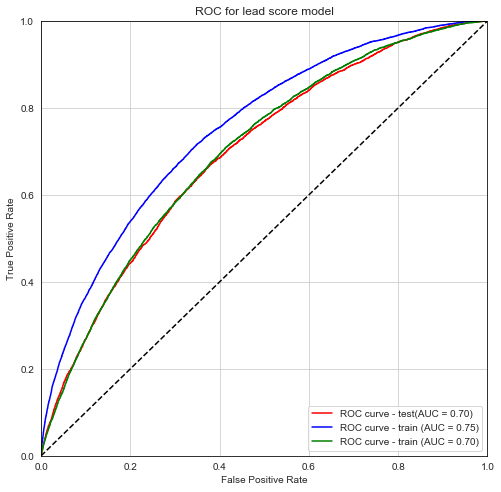

In [166]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

In [167]:
y_pred = gbm.predict(dtest)

In [168]:
print(y_pred.max(), y_pred.min(), y_pred.mean())

0.6706335 0.0071894163 0.13553745


In [169]:
importance=gbm.get_fscore()

In [170]:
df_importance = pd.DataFrame.from_dict(importance,orient='index')#, columns=['feature', 'fscore'])
df_importance = df_importance.reset_index()
df_importance.columns=['feature','fscore']
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

In [171]:
df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
2,dti,0.035609
32,annualinc,0.032561
29,installment,0.031880
13,bcutil,0.028222
35,avgcurbal,0.027971
...,...,...
79,purpose_major_purchase,0.000143
82,accnowdelinq,0.000143
80,purpose_car,0.000108
81,purpose_vacation,0.000108


<Figure size 2304x2304 with 0 Axes>

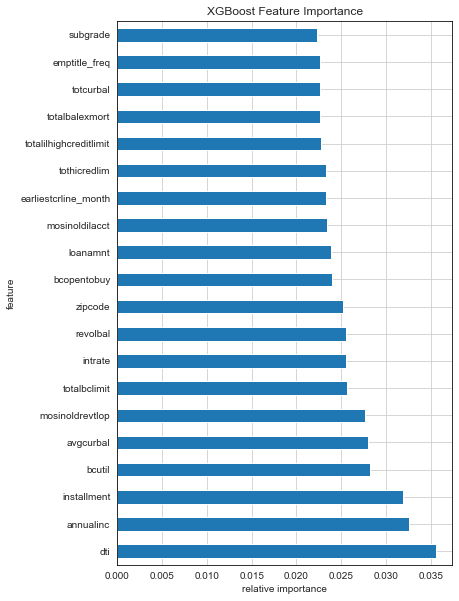

In [172]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

## Save model

In [173]:
import pickle

In [174]:
pickle.dump(gbm, open('model.pkl', "wb"))# it doesn't close the file. It will save the model

In [175]:
with open('model.pkl','wb') as pkl_file:
    pickle.dump(gbm, pkl_file)

In [177]:
from sklearn.externals import joblib
joblib.dump(gbm, "pima.joblib.dat")

['pima.joblib.dat']